# Análisis de las ventas mundiales de videojuegos
 **Grupo 2**
 **Equipo 5**
- Luis David Dávila Torres
- Josué Alonso Salazar Serrato

## Índice   
1. [Objetivo](#id1)
2. [Preguntas de interés](#id2)
3. [Descripción](#id3)
4. [Procesando los datos](#id4)
    1. [Visualización de los datos](#id4.1)
    2. [Tipos de Datos](#id4.2)
    3. [Datos Nulos](#id4.3)
    4. [Limpieza](#id4.4)
5. [Datos Procesados](#id5)
6. [Descripción estadística](#id6)
7. [Gráficos](#id7)
8. [Respondiendo preguntas de interes](#id8)
9. [Regresion Logística](#id9)
10. [Predicciones](#id10)

## Objetivo <a name="id1"></a>
Ser capaces de seguir el comportamiento de ventas de un videojuego para clasificar un juego como exitoso o no. Para esto nos centramos en un modelo de red neuronal. Además de conocer las preferencias de genero de cada región, para saber que juego tiene más probabilidades de ser exitoso o no por cada región.


## Preguntas de interés<a name="id2"></a>

1.	¿Un juego que fue lanzado será exitoso o no, bajo las condiciones iniciales de su plataforma, genero, puntaje y clasificación?

2.	¿Me convendría crear mi juego exclusivo para alguna compañía, o de un género en específico conociendo ya las preferencias de alguna región en específico?

## Descripción<a name="id3"></a>
La base de datos está orientada a las ventas mundiales en distintas regiones de videojuegos, esta información es bastante útil para generar una predicción o estimación para el lanzamiento de un videojuego con ciertas características en las distintas regiones correspondientes, también puede ayudar en base a las ventas en distintas regiones a saber el impacto de cierto videojuego y si convendría o no su lanzamiento en dada región debido a su volumen de venta y crítica. 

Las ventas en esta base de datos están en unidades vendidas de cada juego en millones.

**Columnas**
- Name: Representa el nombre del videojuego.
- Platform: Plataforma o consola donde fue lanzado el juego.
- Year_of_Release: Año que fue lanzado el videojuego desde 1985 hasta 2016
- Genre: Genero del videojuego.
- Publisher: Compañía que publico el videojuego y lanzo juego al mercado.
- NA_Sales: Numero de ventas en Norte América.
- EU_Sales: Numero de ventas en Europa.
- JP_Sales: Numero de ventas en Japón.
- Other_Sales: Numero de ventas en otras partes del mundo.
- Global_Sales: Numero de ventas en todo el mundo.
- Critic_Score: Es el score o puntuación que le asigno la página.
- Critic_Count: Es el número de críticas que se realizaron para el critic score.
- User_Score: Es el score o puntuación que se asignó en base a los usuarios de la página.
- User_Count: Es el número de críticas que se enviaron por parte de los usuarios para el user score.
- Developer: Es la desarrolladora o compañía que crea (programa) el videojuego.
- Rating: Es la clasificación ESRB



## Procesando los datos<a name="id4"></a>

Importar las librerías.

In [56]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#import seaborn as sb


from matplotlib.colors import ListedColormap

#from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import seaborn as sns
sns.set(style="white")



Cargar el archivo con la información de nuestra base.

In [2]:
#SALES = pd.read_csv("C:/Users/jos/josue/Mineria_de_Datos/Avance PIA/BASE USAR.csv") #josue
SALES = pd.read_csv("C:/Users/david/Mineria Datos/josue/Mineria_de_Datos/Avance PIA/BASE USAR.csv") # David 
Data=pd.DataFrame(SALES)

**Visualización de los datos**<a name="id4.1"></a>

In [14]:
Data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Visualizamos los primeros 5 registros de la base de datos donde vemos algunos datos nulos (NaN), así como columnas que no necesitaremos y nombres de columnas en inglés que pasaremos a ajustar posteriormente para una mejor comprensión.

Cantidad de registros y variables o columnas.

In [15]:
Data.shape

(16719, 16)

Obtenemos un total de 16719 registros con 16 columnas o variables.

**Tipos de Datos** <a name="id4.2"></a>

Información necesaria para realizar los análisis y no exista problemas por no homogenización de los datos de cada columna

In [16]:
Data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

Tenemos datos float64 para numéricos y object para string o cadena de caracteres.




**Datos Nulos** <a name="id4.3"></a>

Se busca encontrar registros que puedan afectar al momento de realizar nuestros datos estadísticos o a la aplicación de los modelos a usar

In [17]:
Data.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

Tenemos 6 Columnas sin datos nulos y 10 con datos nulos.

**Cantidad de Datos Nulos por Columna**

In [18]:
Data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Se encontró una cantidad muy grande de registros nulos por lo que pasaremos a una limpieza

**Limpieza**<a name="id4.4"></a>

Primeramente, renombramos las columnas que utilizaremos en nuestro análisis y guardamos en una nueva data para evitar pérdida de datos de nuestra data original.

In [3]:
Data2=Data.rename(columns = {'Name':'Nombre','Platform':'Plataforma','Year_of_Release':'Lanzamiento','Genre':'Genero','NA_Sales':'V_NA',
                             'EU_Sales':'V_EU','JP_Sales':'V_JP','Other_Sales':'V_Otros','Global_Sales':'V_Global',
                             'Critic_Score':'Score','User_Score':'Score_Usuarios','Rating':'ESRB'})

Eliminando Columnas innecesarias
- Publisher

- Critic Count

- User Count

- Developer

- Score Usuarios 

Estas se eliminan debido a que son irrelevantes para nuestro objetivo y tienen un alto volumen de datos nulos.

In [4]:
Data3=Data2.drop(['Publisher','Critic_Count', 'User_Count', 'Developer','Score_Usuarios'],axis=1)

Eliminando los registros con datos nulos en nuestra base.

In [5]:
Data4 = Data3.dropna(axis=0) 

Se arregla el tipo de dato del año dejándolo como entero

In [6]:
Data4['Lanzamiento'] = Data4['Lanzamiento'].astype(np.int64)

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Re ordenaremos los index de cada juego para poder simplificar los algoritmos que se usaran.

In [7]:
Data5=Data4.reset_index(drop=True)

## Datos Procesados <a name="id5"></a>

In [17]:
Data5.head()

,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.53,76.0,E
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,E
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,E
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,E
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.92,58.0,E


In [18]:
Data5.shape

(7902, 11)

Después de realizar toda la limpieza nos da un resultado de 7902 Registros y 11 Columnas listos para realizar nuestros análisis.

## Descripción estadística <a name="id6"></a>

Dado que algunos juegos se venden en distintas plataformas es importante saber exactamente cuántos juegos en realidad analizaremos para esto, se emplea la siguiente línea.

También nos importa el número de plataformas de videojuegos.


In [26]:
len(Data5['Nombre'].unique())
len(Data5['Plataforma'].unique())

17

Tenemos 4975 juegos que se lanzaron en 17 plataformas distintas.

**Analizando las ventas globales**

In [44]:
Data5['V_Global'].describe()

count    7902.000000
mean        0.698921
std         1.839605
min         0.010000
25%         0.100000
50%         0.250000
75%         0.660000
max        82.530000
Name: V_Global, dtype: float64

En el análisis descriptivo, vemos una media de venta global en 0.69 millones de unidades vendidas, con un máximo de 82.53 millones y mínimo de 0.01.

**Analizando los score de los juegos**

In [45]:
Data5['Score'].describe()

count    7902.000000
mean       68.995318
std        13.934261
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Score, dtype: float64

En el análisis descriptivo, vemos una media de puntuación que la página asigna de 68.99, con un máximo de 98 y mínimo de 13.

Obtendremos nuevos data frame con la información de los títulos de juegos que cada compañía se encarga de comercializar estas plataformas Nintendo, Sony, Sega, Microsoft, Otros.



In [9]:
Nintendo = Data5[(Data5['Plataforma'] == '3DS') | (Data5['Plataforma'] == 'DS') | (Data5['Plataforma'] == 'GB') |(Data5['Plataforma'] == 'GBA') | (Data5['Plataforma'] == 'N64') | (Data5['Plataforma'] == 'GC') | (Data5['Plataforma'] == 'NES') | (Data5['Plataforma'] == 'SNES') | (Data5['Plataforma'] == 'Wii') | (Data5['Plataforma'] == 'WiiU')]
Sony = Data5[ (Data5['Plataforma'] == 'PS') |(Data5['Plataforma'] == 'PS2') | (Data5['Plataforma'] == 'PSP') | (Data5['Plataforma'] == 'PS3') | (Data5['Plataforma'] == 'PS4') | (Data5['Plataforma'] == 'PSV')]
Sega = Data5[(Data5['Plataforma'] == 'GEN') |(Data5['Plataforma'] == 'SCD') | (Data5['Plataforma'] == 'DC') | (Data5['Plataforma'] == 'GG')]
Microsoft = Data5[(Data5['Plataforma'] == 'XB') |(Data5['Plataforma'] == 'X360') | (Data5['Plataforma'] == 'XOne') ]
Otros = Data5[(Data5['Plataforma'] == '2006') |(Data5['Plataforma'] == '3DO') | (Data5['Plataforma'] == 'NG') | (Data5['Plataforma'] == 'PCFX') | (Data5['Plataforma'] == 'TG16') ]


Reseteando los index de cada una.

In [28]:
Nintendo=Nintendo.reset_index(drop=True)
Sony=Sony.reset_index(drop=True)
Sega=Sega.reset_index(drop=True)
Microsoft=Microsoft.reset_index(drop=True)
Otros=Otros.reset_index(drop=True)

Mostrando los nuevo data frames.

**Nintendo**

In [29]:
Nintendo.head()

,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.53,76.0,E
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,E
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,E
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,E
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.92,58.0,E


**Sony**

In [30]:
Sony.head()

,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.04,97.0,M
1,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,20.81,95.0,M
2,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,16.15,95.0,M
3,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,14.98,95.0,E
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83.0,M


**Sega**

In [31]:
Sega.head()

,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB
0,Shenmue,DC,1999,Adventure,0.52,0.24,0.38,0.04,1.18,88.0,T
1,NFL 2K1,DC,2000,Sports,1.02,0.05,0.00,0.02,1.09,97.0,E
2,Seaman,DC,1999,Simulation,0.00,0.00,0.52,0.00,0.52,82.0,T
3,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,0.34,98.0,T
4,Capcom vs. SNK,DC,2000,Fighting,0.00,0.00,0.22,0.00,0.22,80.0,T


**Microsoft**

In [29]:
Microsoft.head()

,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,21.81,61.0,E
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,M
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,14.73,88.0,M
3,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,14.61,87.0,M
4,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,13.67,83.0,M


In [32]:
Generacion7 = Data5[Data5.Plataforma.isin(['Wii', 'PS3', 'X360'])]
Generacion7.shape

(2254, 11)

In [33]:
Generacion8 = Data5[Data5.Plataforma.isin(['WiiU', 'PS4', 'XOne'])]
Generacion8.shape

(492, 11)

Se realiza una clasificación de las generaciones para analizar las ventas más delante  

## Gráficos <a name="id7"></a>

**Ventas Globales para la 7ma Generacion**

Text(0, 0.5, 'Ventas Globales')

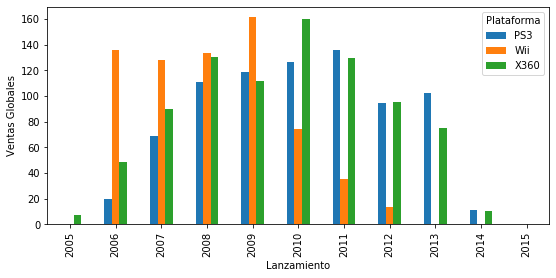

In [34]:
VentaAnual7 = Generacion7.groupby(['Lanzamiento','Plataforma']).V_Global.sum()
VentaAnual7.unstack().plot(kind='bar',figsize=(9, 4))
#plt.title('Ventas Globales para la 7ma Generacion')
plt.ylabel('Ventas Globales')

Se puede observar que del año 2006 al 2009 Wii era la mejor opcion para invertir dado a su alto numero de ventas en dicha plataforma, siendo posteriormente relegada, por PS3 y Xbox 360 y decresiendo estos ya para final de la generacion en 2014

**Ventas Globales para la 8va Generacion**

Text(0, 0.5, 'Ventas Globales')

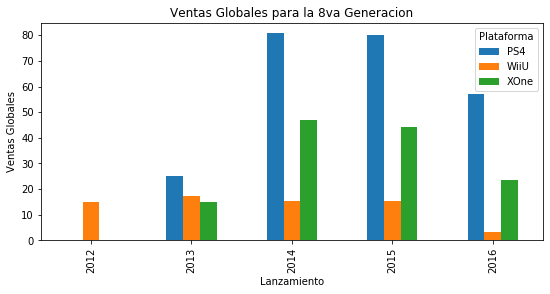

In [35]:
VentaAnual8 = Generacion8.groupby(['Lanzamiento','Plataforma']).V_Global.sum()
VentaAnual8.unstack().plot(kind='bar',figsize=(9, 4))
plt.title('Ventas Globales para la 8va Generacion')
plt.ylabel('Ventas Globales')

Esta es la generacion actual por lo que si se desea desarrollar un juego nuevo es un aspecto importante por que se relaciona directamente con el numero de plataformas, aun que igualmente existen juegos que se pueden desarrollar para las 3 consolas pero aun costo mayor de producción.

**Generos con mas unidades de juegos a la venta**

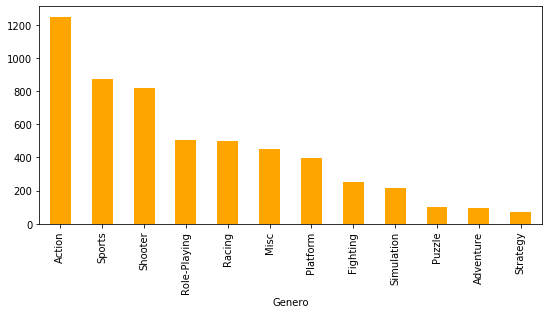

In [36]:
NGenero = Data5.groupby(['Genero']).sum().copy()
NGenero.V_Global.sort_values(ascending=False).plot(kind='bar', figsize=(9, 4),color='orange');

Cuales la mayor competencia en el sector de videojuegos con respecto a genero, pero esto se relaciona con los gustos del mercado de cada region. Destacando el género de acción como de los más vendidos.

**Generos mas populares en Japon en base a sus ingresos**

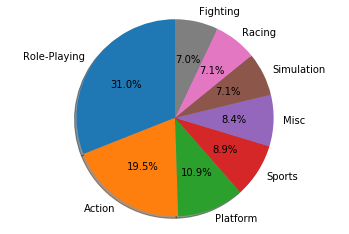

In [37]:
NGenJp=Data5.groupby('Genero').sum().V_JP.sort_values(ascending=False).head(8)
fig1, ax1 = plt.subplots()
ax1.pie(NGenJp, labels=NGenJp.index, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

En japon se vende mas juegos del tipo Role-Playing por lo que si vamos a producir un juego en este pais hay que seguir estos gustos para una mayor seguiridad de exito.

**Generos mas populares en Norte America en base a sus ingresos**

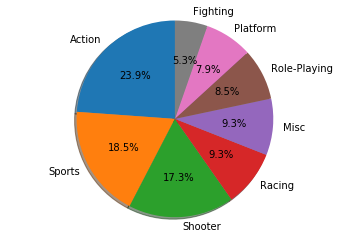

In [38]:
NGenNA=Data5.groupby('Genero').sum().V_NA.sort_values(ascending=False).head(8)
fig1, ax1 = plt.subplots()
ax1.pie(NGenNA, labels=NGenNA.index, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

En Norte America se vende mas juegos del tipo Accion, seguido por el genero deportes por lo que si vamos a producir un juego en esta region hay que seguir estos gustos para una mayor seguridad de exito.

**Generos mas populares en Europa en base a sus ingresos**

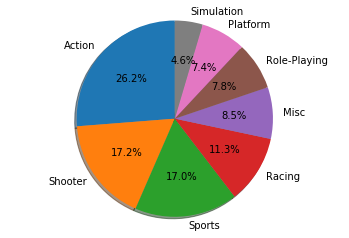

In [39]:
NGenEU=Data5.groupby('Genero').sum().V_EU.sort_values(ascending=False).head(8)
fig1, ax1 = plt.subplots()
ax1.pie(NGenEU, labels=NGenEU.index, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

En Europa se vende mas juegos del tipo Acción, seguido del genero shooter por lo que si vamos a producir un juego en esta region hay que seguir estos gustos para una mayor seguiridad de exito.

**Generos mas populares en el resto del mundo en base a sus ingresos**

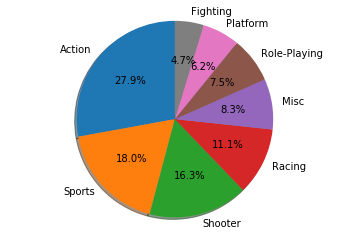

In [132]:
NGenOt=Data5.groupby('Genero').sum().V_Otros.sort_values(ascending=False).head(8)
fig1, ax1 = plt.subplots()
ax1.pie(NGenOt, labels=NGenOt.index, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

En el resto del mundo se vende mas juegos del tipo Acción, seguido del genero shooter por lo que si vamos a producir un juego en esta region hay que seguir estos gustos para una mayor seguiridad de exito.

**Ventas Globales por Region en unidades de millones a travez del tiempo**

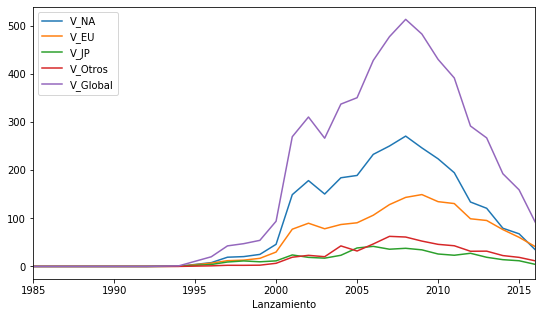

In [130]:
Ventas = Data5[[x for x in Data5.columns if 'V_' in x]+['Lanzamiento']]
Ventas.groupby('Lanzamiento').sum().plot(figsize=(9, 5))

Se aprecia que las ventas globales y ventas en otras regiones han tenido un decremento a partir del año 2009, esto generado por la descentralización de la industria, que se ha expandido, a pc y smartphones.

Ahora bien, se aprecia que entre 1985 y 1995 hay una venta casi nula debido a que posiblemente apenas se pensaba implantarse en el mercado pues los videojuegos eran relativamente nuevos, después de allí se tiene un crecimiento importante, más en Norte América que se ilustra con el color azul en la gráfica y en segunda posición Europa. 

Algo interesante en general, es que Norte América y Europa tienen intereses similares en género de videojuegos y gráficamente en las ventas se nota una tendencia similar en ambas pero en menor escala. Es bueno saberlo si se desea sacar un videojuego de cierto género en particular, también porque acción es u género relevante en las tres zonas.  


## Respondiendo preguntas de interes <a name="id8"></a>

¿Me convendría crear mi juego exclusivo para alguna compañía, o de un género en específico conociendo ya las preferencias de alguna región en específico?

En el caso que decidiéramos lanzar un juego, como una compañía que aún no tiene el presupuesto de un empresa grande, analizar el mercado es muy importante, es por eso que decidimos, enfocarnos en un país en específico en este caso Japón, donde observamos que las ventas del género de role-playing son las que más ganancias genera, además en este país así como en el resto del mundo para esta generación, desarrollar para PS4 nos traería más alcance.


**Agregando variable que estable si un juego es exitoso o no según sus ventas**

In [8]:
Data5['Exito'] = Data5.apply(lambda _: 0, axis=1) 
Data5['Exito'] = 0

In [22]:
Data5['V_Global'].describe()


count    7902.000000
mean        0.698921
std         1.839605
min         0.010000
25%         0.100000
50%         0.250000
75%         0.660000
max        82.530000
Name: V_Global, dtype: float64

Se decidió aplicar el **millón** de ventas como un indicador de éxito, dado que las compañías suelen fijar números grandes para su análisis de resultado.

In [9]:
Data5['Exito'][Data5['V_Global']>1]=1

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
Data5.head()

,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB,Exito
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,E,1
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,E,1
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,E,1
3,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,29.80,89.0,E,1
4,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.92,58.0,E,1


Ordenaremos los registros por su año de lanzamiento

In [14]:
Data6 = Data5.sort_values('Lanzamiento')
Data6=Data6.reset_index(drop=True)
Data6.head()

,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB,Exito
0,Alter Ego,PC,1985,Simulation,0.00,0.03,0.00,0.01,0.03,59.0,T,0
1,SimCity,PC,1988,Simulation,0.00,0.02,0.00,0.01,0.03,64.0,E10+,0
2,Doom,PC,1992,Shooter,0.02,0.00,0.00,0.00,0.03,85.0,M,0
3,Battle Arena Toshinden,PS,1994,Fighting,0.39,0.26,0.53,0.08,1.27,69.0,T,1
4,Tomb Raider,PC,1996,Action,0.96,0.07,0.00,0.00,1.03,86.0,M,1


Para nuestra regresion logistica unicamente nos concentraremos en juegos que fueron lanzados del 2005 en adelante, para evitar la influencia de años donde la industria apenas estaba en inicios de desarrollo.

In [23]:
Data7=Data6[Data6['Lanzamiento']>=2005]
Data7=Data6.drop(['V_NA','V_EU', 'V_JP', 'V_Otros','Lanzamiento'],axis=1)
Data7.head()

,Nombre,Plataforma,Genero,V_Global,Score,ESRB,Exito
0,Alter Ego,PC,Simulation,0.03,59.0,T,0
1,SimCity,PC,Simulation,0.03,64.0,E10+,0
2,Doom,PC,Shooter,0.03,85.0,M,0
3,Battle Arena Toshinden,PS,Fighting,1.27,69.0,T,1
4,Tomb Raider,PC,Action,1.03,86.0,M,1


Generando un csv de nuestra tabla final

In [25]:
#Data7.to_csv('C:/Users/jos/josue/Mineria_de_Datos/Avance PIA/DATAVIDEOJUEGOSbuena.csv', index = False)#Josue
Data7.to_csv('C:/Users/david/Mineria Datos/Josue/Mineria_de_Datos/Avance PIA/DATAVIDEOJUEGOSbuena.csv', index = False)#dAVID


In [27]:

#SALES = pd.read_csv("C:/Users/jos/josue/Mineria_de_Datos/Avance PIA/DATAVIDEOJUEGOSbuena.csv") #josue
SALES = pd.read_csv("C:/Users/david/Mineria Datos/Josue/Mineria_de_Datos/Avance PIA/DATAVIDEOJUEGOSbuena.csv") #DAVID
Data7=pd.DataFrame(SALES)

## Regresión Logística <a name="id9"></a>

Variables dependientes e independientes

In [124]:
X = np.array(Data7.drop(['Exito','Nombre','V_Global'],1))
y = np.array(Data7['Exito'])


Convertimos nuestras variables categoricas en Numeros

In [125]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lebelencoder_X_Plataforma= LabelEncoder()
X[:,0]=lebelencoder_X_Plataforma.fit_transform(X[:,0])
lebelencoder_X_Genero= LabelEncoder()
X[:,1]=lebelencoder_X_Genero.fit_transform(X[:,1])
lebelencoder_X_ESRB= LabelEncoder()
X[:,3]=lebelencoder_X_ESRB.fit_transform(X[:,3])


Validación de nuestro modelo

Para ello, subdividimos nuestros datos de entrada en forma aleatoria (mezclados) utilizando 80% de registros para entrenamiento y 20% para validar.

In [132]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

**Generamos el modelo de Regresión Logística**

In [133]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Y ahora hacemos las predicciones -en realidad clasificación- utilizando nuestro «cross validation set», es decir del subconjunto que habíamos apartado. En este caso vemos que los aciertos fueron del 84% pero hay que tener en cuenta que el tamaño de datos era pequeño.

In [134]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8425047438330171


Funcion para graficar la matriz de Confusion 

In [136]:
#http://www.statdeveloper.com/regresion-logistica-en-python/
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('Etiqueta Real')
  plt.xlabel('Etiqueta Predicha')


Grafica de matriz de confusion

Text(0.5, 1, '')

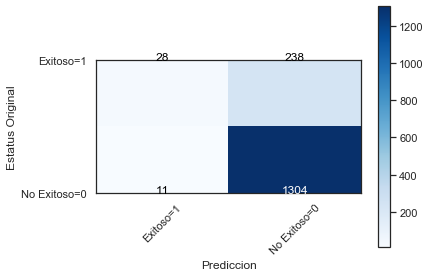

In [138]:
cnf_matrix = confusion_matrix(Y_validation, predictions, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Exitoso=1','No Exitoso=0'],normalize= False, title='Matriz de confusión')
plt.ylabel('Estatus Original')
plt.xlabel('Prediccion')
plt.title('')

Matriz de precision del modelo para cada variable

In [140]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1315
           1       0.72      0.11      0.18       266

    accuracy                           0.84      1581
   macro avg       0.78      0.55      0.55      1581
weighted avg       0.82      0.84      0.79      1581



## Predicciones <a name="id10"></a>

**Predicción 1** 

Plataforma: PS4 Género: Shooter Score:60 ESBR:M

El Resultado de la predicción fue no exitoso


In [141]:
X_new = pd.DataFrame({'Plataforma': [1], 'Genero': [8], 'Score': [60], 'ESBR': [2]})
model.predict(X_new)

array([0], dtype=int64)

**Predicción 2** 

Plataforma: XONE Género: action Score:50 ESBR:E

El Resultado de la predicción fue exitoso


In [143]:
X_new = pd.DataFrame({'Plataforma': [5], 'Genero': [0], 'Score': [90], 'ESBR': [0]})
model.predict(X_new)

array([1], dtype=int64)

**Respondiendo preguntas de interés**

Que un juego o no sea exitoso involucra muchas características sin embargo, una de las más importantes que notamos con nuestras predicciones es que el score influye mucho al momento de adquirir un juego, por lo que generar juegos de calidad, y del agrado de la gente es la mejor clave sin dejar de lado los géneros más vendidos en cada una de las regiones.